<a href="https://colab.research.google.com/github/Mays-Waddah/test/blob/main/2-AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# قراءة ملف CSV
df = pd.read_csv('/content/sample_data/university data.csv')

# عرض أول 5 صفوف لفهم شكل البيانات
print("أول 5 صفوف من البيانات:")
print(df.head())

# عرض معلومات عن الأعمدة وأنواع البيانات والقيم المفقودة
print("\nمعلومات عن الأعمدة وأنواع البيانات:")
df.info()

أول 5 صفوف من البيانات:
      userName                       major  researchExp  industryExp  \
0       143saf         Systems and Control            0           18   
1   7790ashish   Manufacturing Engineering            0            0   
2         AB25  (MIS / MSIM / MSIS / MSIT)            0           66   
3     abhijitg                         NaN            0            0   
4  abhijitgang                         MIS            0            0   

  specialization  toeflScore program                 department toeflEssay  \
0       Robotics       112.0      MS  Instrumentation & Control         26   
1            NaN         NaN      MS                          0        NaN   
2            NaN        94.0      MS       Computer Engineering         21   
3            NaN         NaN     NaN                          0        NaN   
4            NaN        81.0      MS                   computer        NaN   

   internExp  ...  termAndYear  confPubs                    ugCollege gmat

In [10]:
!pip install scikit-fuzzy matplotlib numpy pandas

In [12]:
import pandas as pd
import numpy as np

# Assuming 'university data.csv' is uploaded to Colab's session storage
df = pd.read_csv('/content/sample_data/university data.csv')

# تنظيف البيانات وتوحيد CGPA (إذا لزم الأمر)
# يمكن أن يكون CGPA على مقياس 10 أو 100 أو 4.0. سنقوم بتوحيده إلى 100 إذا كانت cgpaScale موجودة ومختلفة.
def normalize_cgpa(row):
    if row['cgpaScale'] == 0: # Handle cases where cgpaScale is 0 to avoid division by zero
        return 0
    return (row['cgpa'] / row['cgpaScale']) * 100

# Apply normalization, handling potential NaN or invalid values
df['normalized_cgpa'] = df.apply(normalize_cgpa, axis=1)
df['normalized_cgpa'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['normalized_cgpa'].fillna(df['normalized_cgpa'].mean(), inplace=True) # Fill NaNs for safety

# قم بتنظيف toeflScore و researchExp من القيم المفقودة أو غير الصحيحة
df['toeflScore'].fillna(df['toeflScore'].mean(), inplace=True)
df['researchExp'].fillna(df['researchExp'].mode()[0], inplace=True) # mode for int, mean for float

# يمكنك طباعة إحصائيات لمساعدتك في تحديد النطاقات بدقة
print("\nإحصائيات المدخلات المختارة:")
print(df[['normalized_cgpa', 'toeflScore', 'researchExp']].describe())


إحصائيات المدخلات المختارة:
       normalized_cgpa    toeflScore   researchExp
count     53644.000000  53644.000000  53644.000000
mean         73.625277    109.558826      0.339535
std          34.445443     34.344806      2.602942
min           0.000000      0.000000      0.000000
25%          68.200000    101.000000      0.000000
50%          76.000000    107.000000      0.000000
75%          83.600000    111.000000      0.000000
max        1825.000000   1350.000000     53.000000


Predicted Admission Likelihood: 62.50


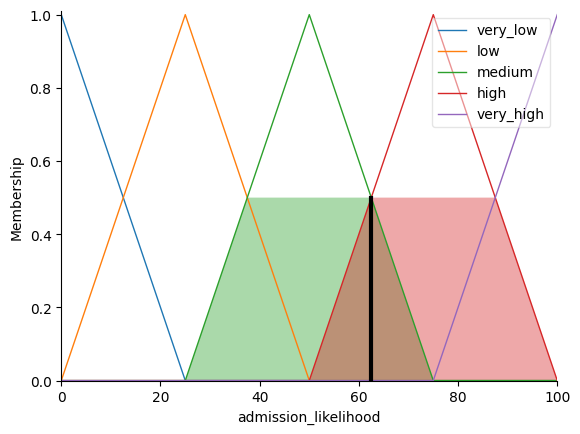

In [15]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. تعريف المتغيرات الضبابية (Inputs and Output)
# بناءً على النطاقات التي حددناها
cgpa = ctrl.Antecedent(np.arange(0, 101, 1), 'cgpa')
toeflScore = ctrl.Antecedent(np.arange(0, 121, 1), 'toeflScore')
researchExp = ctrl.Antecedent(np.arange(0, 51, 1), 'researchExp')
admission_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'admission_likelihood')

# 2. تعريف دوال الانتماء (Membership Functions) - 5 مجموعات لكل
# CGPA
cgpa['very_low'] = fuzz.trimf(cgpa.universe, [0, 0, 40])
cgpa['low'] = fuzz.trimf(cgpa.universe, [0, 40, 60])
cgpa['medium'] = fuzz.trimf(cgpa.universe, [40, 60, 80])
cgpa['high'] = fuzz.trimf(cgpa.universe, [60, 80, 100])
cgpa['very_high'] = fuzz.trimf(cgpa.universe, [80, 100, 100])

# TOEFL Score
toeflScore['very_low'] = fuzz.trimf(toeflScore.universe, [0, 0, 70])
toeflScore['low'] = fuzz.trimf(toeflScore.universe, [0, 70, 85])
toeflScore['medium'] = fuzz.trimf(toeflScore.universe, [70, 85, 100])
toeflScore['high'] = fuzz.trimf(toeflScore.universe, [85, 100, 115])
toeflScore['very_high'] = fuzz.trimf(toeflScore.universe, [100, 120, 120])

# Research Experience
researchExp['none'] = fuzz.trimf(researchExp.universe, [0, 0, 10])
researchExp['low'] = fuzz.trimf(researchExp.universe, [0, 10, 20])
researchExp['medium'] = fuzz.trimf(researchExp.universe, [10, 20, 30])
researchExp['high'] = fuzz.trimf(researchExp.universe, [20, 30, 40])
researchExp['very_high'] = fuzz.trimf(researchExp.universe, [30, 50, 50])

# Admission Likelihood (Output)
admission_likelihood['very_low'] = fuzz.trimf(admission_likelihood.universe, [0, 0, 25])
admission_likelihood['low'] = fuzz.trimf(admission_likelihood.universe, [0, 25, 50])
admission_likelihood['medium'] = fuzz.trimf(admission_likelihood.universe, [25, 50, 75])
admission_likelihood['high'] = fuzz.trimf(admission_likelihood.universe, [50, 75, 100])
admission_likelihood['very_high'] = fuzz.trimf(admission_likelihood.universe, [75, 100, 100])

# (اختياري) لرسم دوال الانتماء للتأكد منها
# cgpa.view()
# toeflScore.view()
# researchExp.view()
# admission_likelihood.view()
# plt.show()

# 3. تعريف القواعد (Rules)
# بناءً على القواعد التي وضعناها يدوياً، مع إضافة المزيد لتغطية السيناريوهات
rule1 = ctrl.Rule(cgpa['very_high'] & toeflScore['very_high'], admission_likelihood['very_high'])
rule2 = ctrl.Rule(cgpa['low'] | toeflScore['low'], admission_likelihood['very_low'])
rule3 = ctrl.Rule(cgpa['medium'] & researchExp['medium'], admission_likelihood['medium'])
rule4 = ctrl.Rule(cgpa['high'] & researchExp['high'], admission_likelihood['high'])
rule5 = ctrl.Rule(toeflScore['very_low'], admission_likelihood['very_low'])
rule6 = ctrl.Rule(cgpa['very_high'] & researchExp['very_high'], admission_likelihood['very_high'])
rule7 = ctrl.Rule(cgpa['low'] & toeflScore['medium'], admission_likelihood['low'])
# أضف المزيد من القواعد هنا بناءً على تحليلك وفهمك لبياناتك

# 4. بناء نظام التحكم الضبابي (Fuzzy Control System)
admission_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7]) # أضف جميع القواعد
admission_simulation = ctrl.ControlSystemSimulation(admission_ctrl)

# 5. إدخال قيم الحالة الجديدة (المثال اليدوي الذي طبقناه)
admission_simulation.input['cgpa'] = 70
admission_simulation.input['toeflScore'] = 90
admission_simulation.input['researchExp'] = 25

# 6. حساب النتيجة (Compute)
admission_simulation.compute()

# 7. عرض النتيجة
print(f"Predicted Admission Likelihood: {admission_simulation.output['admission_likelihood']:.2f}")

# (اختياري) لعرض المخرجات الضبابية بعد الحساب
admission_likelihood.view(sim=admission_simulation)
plt.show()

Error: 'university data.csv' not found. Please ensure the file is uploaded to Colab.

--- Handling Missing Values (Mean Imputation) ---
No missing values in 'researchExp'.
No missing values in 'industryExp'.
No missing values in 'toeflScore'.
No missing values in 'internExp'.
No missing values in 'greV'.
No missing values in 'greQ'.
No missing values in 'greA'.
No missing values in 'topperCgpa'.
No missing values in 'cgpa'.
No missing values in 'cgpaScale'.

Data preprocessing complete. Features scaled to [0, 1] range.

--- Generating Data Visualizations ---


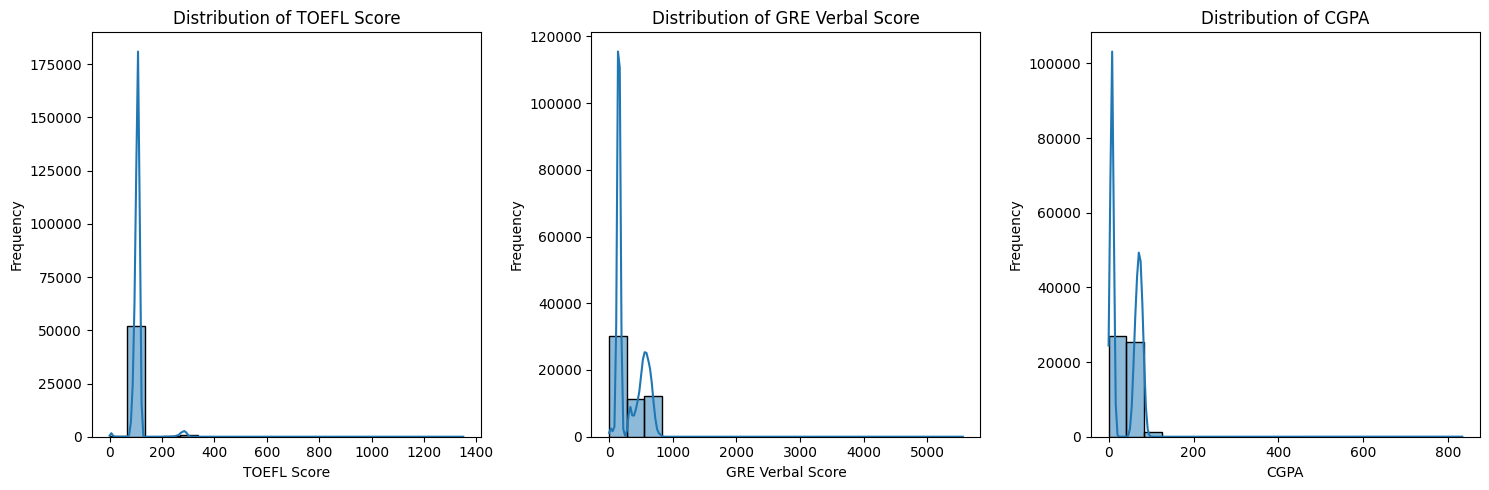

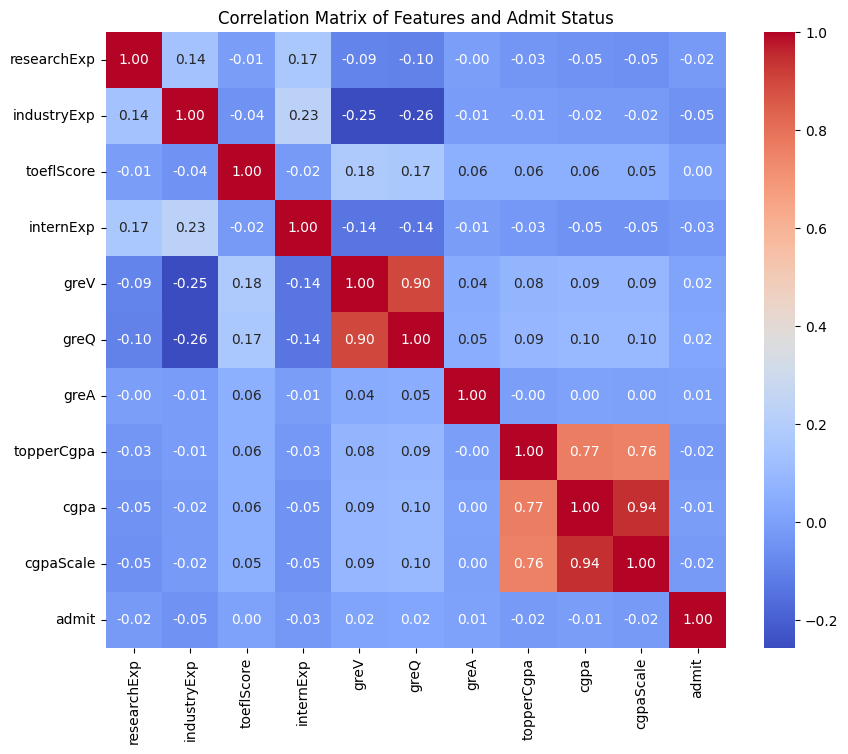

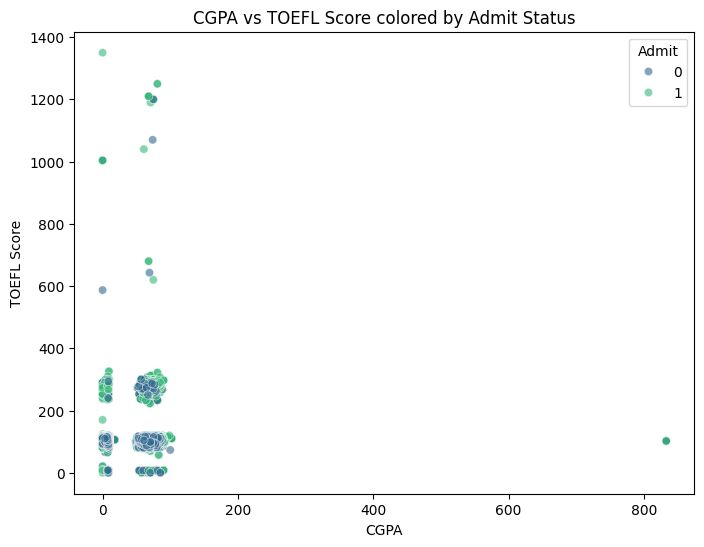


--- Applying Common Machine Learning Algorithms ---

=== Logistic Regression ===
Accuracy: 0.5304

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.15      0.24      5205
           1       0.53      0.89      0.66      5524

    accuracy                           0.53     10729
   macro avg       0.54      0.52      0.45     10729
weighted avg       0.54      0.53      0.46     10729


Confusion Matrix:
 [[ 790 4415]
 [ 623 4901]]

=== Support Vector Machine (SVM) ===
Accuracy: 0.5218

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.09      0.15      5205
           1       0.52      0.93      0.67      5524

    accuracy                           0.52     10729
   macro avg       0.53      0.51      0.41     10729
weighted avg       0.53      0.52      0.42     10729


Confusion Matrix:
 [[ 453 4752]
 [ 379 5145]]

=== Random Forest Classifier ===
Accuracy: 0.57

<ipython-input-17-1497224734>:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=[input_features[i] for i in sorted_idx], palette='viridis')


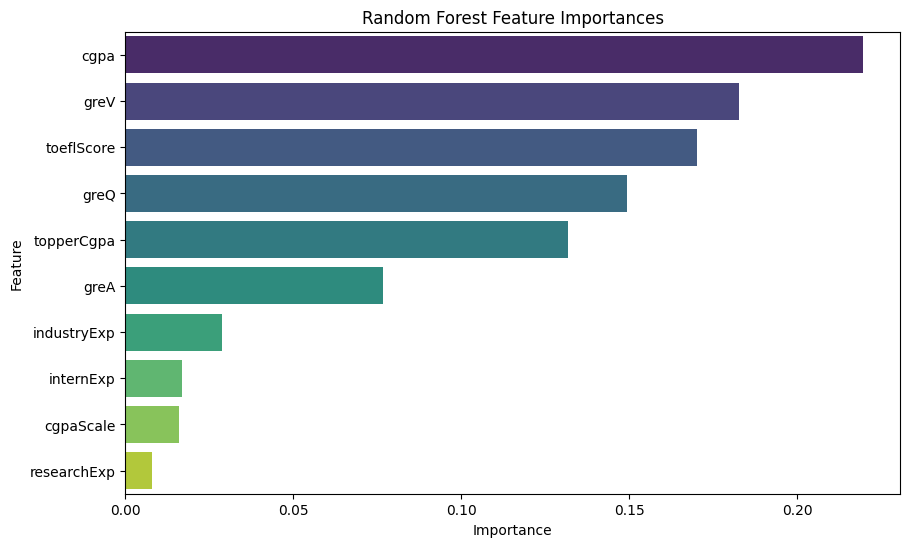


--- Starting Genetic Algorithm Implementation ---

Starting GA training for 100 generations...
Generation 1/100: Best Fitness = 0.7501 (Gen Max: 0.7501)
Generation 10/100: Best Fitness = 0.7666 (Gen Max: 0.7666)
Generation 20/100: Best Fitness = 0.7677 (Gen Max: 0.7677)
Generation 30/100: Best Fitness = 0.7677 (Gen Max: 0.7677)
Generation 40/100: Best Fitness = 0.7678 (Gen Max: 0.7678)
Generation 50/100: Best Fitness = 0.7678 (Gen Max: 0.7678)
Generation 60/100: Best Fitness = 0.7678 (Gen Max: 0.7678)
Generation 70/100: Best Fitness = 0.7679 (Gen Max: 0.7679)
Generation 80/100: Best Fitness = 0.7679 (Gen Max: 0.7679)
Generation 90/100: Best Fitness = 0.7679 (Gen Max: 0.7679)
Generation 100/100: Best Fitness = 0.7680 (Gen Max: 0.7680)

--- Genetic Algorithm Training Finished ---
Best Chromosome (Input Weights): [ 0.3075918   0.42138593  1.          0.66766075  1.          1.
  0.63754013 -0.01479701  0.27056571  0.31515617]
Best Fitness Achieved: 0.7680

Final GA Input Weights (in orde

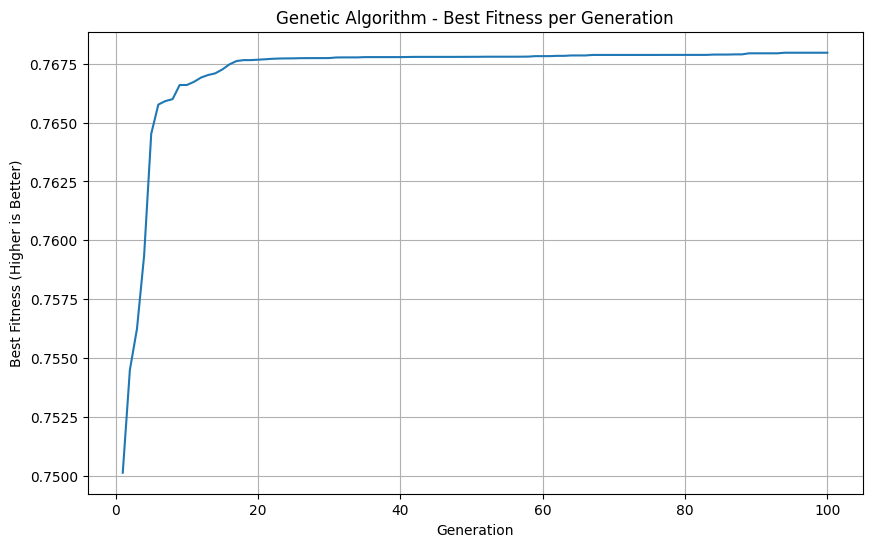


--- GA Performance on Test Data ---
GA Model Accuracy on Test Data: 0.4949

GA Model Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.49      0.69      0.57      5205
           1       0.52      0.31      0.39      5524

    accuracy                           0.49     10729
   macro avg       0.50      0.50      0.48     10729
weighted avg       0.50      0.49      0.48     10729


GA Model Confusion Matrix on Test Data:
 [[3598 1607]
 [3812 1712]]


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations like heatmaps

# --- 1. Data Loading and Preprocessing ---

try:
    df = pd.read_csv('university data.csv')
    print("Data loaded successfully.\n")
    print("--- Data Info (df.info()) ---\n")
    df.info()
    print("\n--- First 5 rows of data (df.head()) ---\n")
    print(df.head())
    print("\n--- Available columns for input and output selection ---\n")
    print(df.columns.tolist())

except FileNotFoundError:
    print("Error: 'university data.csv' not found. Please ensure the file is uploaded to Colab.")
    # Exit if file not found to prevent further errors
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Define input features and target output based on data exploration
input_features = [
    'researchExp', 'industryExp', 'toeflScore', 'internExp', 'greV',
    'greQ', 'greA', 'topperCgpa', 'cgpa', 'cgpaScale'
]
target_feature = 'admit' # This is already 0 or 1, suitable for classification/prediction

# Handle missing values by filling them with the mean of the column
print("\n--- Handling Missing Values (Mean Imputation) ---")
for col in input_features:
    if df[col].isnull().any():
        initial_na_count = df[col].isnull().sum()
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled {initial_na_count} missing values in '{col}' with its mean.")
    else:
        print(f"No missing values in '{col}'.")


# Convert selected features and target to NumPy arrays
X = df[input_features].values
y = df[target_feature].values

# Normalize input features (Min-Max Scaling)
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

print("\nData preprocessing complete. Features scaled to [0, 1] range.")

# --- 2. Data Visualizations ---

print("\n--- Generating Data Visualizations ---")

# 2.1 Histograms for key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['toeflScore'], kde=True, bins=20)
plt.title('Distribution of TOEFL Score')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['greV'], kde=True, bins=20)
plt.title('Distribution of GRE Verbal Score')
plt.xlabel('GRE Verbal Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['cgpa'], kde=True, bins=20)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2.2 Correlation Matrix Heatmap
# Combine scaled features into a DataFrame for correlation calculation
df_scaled_features = pd.DataFrame(X_scaled, columns=input_features)
# Add target to the DataFrame for correlation with target
df_scaled_features['admit'] = y

plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Admit Status')
plt.show()

# 2.3 Scatter Plot of two important features, colored by admit status
# Assuming 'cgpa' and 'toeflScore' are important
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['cgpa'], y=df['toeflScore'], hue=df['admit'], palette='viridis', alpha=0.6)
plt.title('CGPA vs TOEFL Score colored by Admit Status')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.legend(title='Admit')
plt.show()


# --- 3. Train-Test Split for Supervised Machine Learning Models ---
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n--- Applying Common Machine Learning Algorithms ---")

# --- 3.1 Logistic Regression ---
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# --- 3.2 Support Vector Machine (SVM) ---
print("\n=== Support Vector Machine (SVM) ===")
# Using a linear kernel for faster computation on large datasets.
# For complex boundaries, a 'rbf' kernel might be used but is slower.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# --- 3.3 Random Forest Classifier ---
print("\n=== Random Forest Classifier ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1] # Sort in descending order

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=[input_features[i] for i in sorted_idx], palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# --- 4. Genetic Algorithm Implementation (as provided previously, now using X_scaled, y_train for fitness) ---

print("\n--- Starting Genetic Algorithm Implementation ---")

# GA Parameters (redefined for clarity, consistent with previous code)
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
NUM_INPUTS = len(input_features)
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.8
WEIGHT_BOUNDS = (-1, 1)

# Function to create a single chromosome
def create_chromosome(num_inputs, bounds):
    return np.array([random.uniform(bounds[0], bounds[1]) for _ in range(num_inputs)])

# Fitness Function for GA (using training data for evaluation)
def calculate_fitness_ga(chromosome, X_data, y_data):
    if np.sum(np.abs(chromosome)) == 0:
        return 0.0

    predicted_y = np.dot(X_data, chromosome)
    mse = np.mean((y_data - predicted_y)**2)
    fitness = 1 / (1 + mse)
    return fitness

# Selection Function (Tournament Selection)
def select_parents_ga(population, fitnesses, num_parents_to_select):
    parents = []
    tournament_size = 5
    for _ in range(num_parents_to_select):
        contenders_indices = random.sample(range(len(population)), tournament_size)
        best_contender_index = contenders_indices[0]
        for i in contenders_indices:
            if fitnesses[i] > fitnesses[best_contender_index]:
                best_contender_index = i
        parents.append(population[best_contender_index])
    return parents

# Crossover Function (Single-Point Crossover)
def crossover_ga(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation Function (Gaussian Mutation)
def mutate_ga(chromosome, mutation_rate, bounds):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] += np.random.normal(0, 0.1)
            chromosome[i] = np.clip(chromosome[i], bounds[0], bounds[1])
    return chromosome

# Initialize the first population
population_ga = [create_chromosome(NUM_INPUTS, WEIGHT_BOUNDS) for _ in range(POPULATION_SIZE)]

best_chromosome_ga = None
best_fitness_ga = -1.0
fitness_history_ga = []

print(f"\nStarting GA training for {NUM_GENERATIONS} generations...")

for generation in range(NUM_GENERATIONS):
    fitnesses_ga = [calculate_fitness_ga(chrom, X_train, y_train) for chrom in population_ga]

    current_max_fitness_ga = np.max(fitnesses_ga)
    fitness_history_ga.append(current_max_fitness_ga)

    current_best_idx_ga = np.argmax(fitnesses_ga)
    if fitnesses_ga[current_best_idx_ga] > best_fitness_ga:
        best_fitness_ga = fitnesses_ga[current_best_idx_ga]
        best_chromosome_ga = population_ga[current_best_idx_ga].copy()

    if (generation + 1) % 10 == 0 or generation == 0:
        print(f"Generation {generation + 1}/{NUM_GENERATIONS}: Best Fitness = {best_fitness_ga:.4f} (Gen Max: {current_max_fitness_ga:.4f})")

    next_population_ga = []
    num_elites = 1 # Keep the single best individual
    sorted_population_indices_ga = np.argsort(fitnesses_ga)[::-1]
    for i in range(num_elites):
        next_population_ga.append(population_ga[sorted_population_indices_ga[i]])

    while len(next_population_ga) < POPULATION_SIZE:
        parent1_ga, parent2_ga = random.sample(select_parents_ga(population_ga, fitnesses_ga, 2), 2)

        if random.random() < CROSSOVER_RATE:
            child1_ga, child2_ga = crossover_ga(parent1_ga, parent2_ga)
        else:
            child1_ga, child2_ga = parent1_ga.copy(), parent2_ga.copy()

        child1_ga = mutate_ga(child1_ga, MUTATION_RATE, WEIGHT_BOUNDS)
        child2_ga = mutate_ga(child2_ga, MUTATION_RATE, WEIGHT_BOUNDS)

        next_population_ga.append(child1_ga)
        if len(next_population_ga) < POPULATION_SIZE:
            next_population_ga.append(child2_ga)

    population_ga = next_population_ga


print("\n--- Genetic Algorithm Training Finished ---")
print(f"Best Chromosome (Input Weights): {best_chromosome_ga}")
print(f"Best Fitness Achieved: {best_fitness_ga:.4f}")

print("\nFinal GA Input Weights (in order):")
for i, weight in enumerate(best_chromosome_ga):
    print(f"- {input_features[i]}: {weight:.4f}")

# --- 5. GA Fitness History Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_GENERATIONS + 1), fitness_history_ga)
plt.title('Genetic Algorithm - Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Higher is Better)')
plt.grid(True)
plt.show()

# --- 6. Example GA Prediction on Test Data ---
print("\n--- GA Performance on Test Data ---")
# Predict on the test set using the best GA chromosome
ga_test_predictions_raw = np.dot(X_test, best_chromosome_ga)
# Convert continuous predictions to binary (0 or 1) using a threshold
ga_test_predictions_binary = (ga_test_predictions_raw > 0.5).astype(int) # Common threshold for 0/1 output

print(f"GA Model Accuracy on Test Data: {accuracy_score(y_test, ga_test_predictions_binary):.4f}")
print("\nGA Model Classification Report on Test Data:\n", classification_report(y_test, ga_test_predictions_binary))
print("\nGA Model Confusion Matrix on Test Data:\n", confusion_matrix(y_test, ga_test_predictions_binary))

Data loaded successfully.

--- Data Info (df.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  

<ipython-input-3-2770204046>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


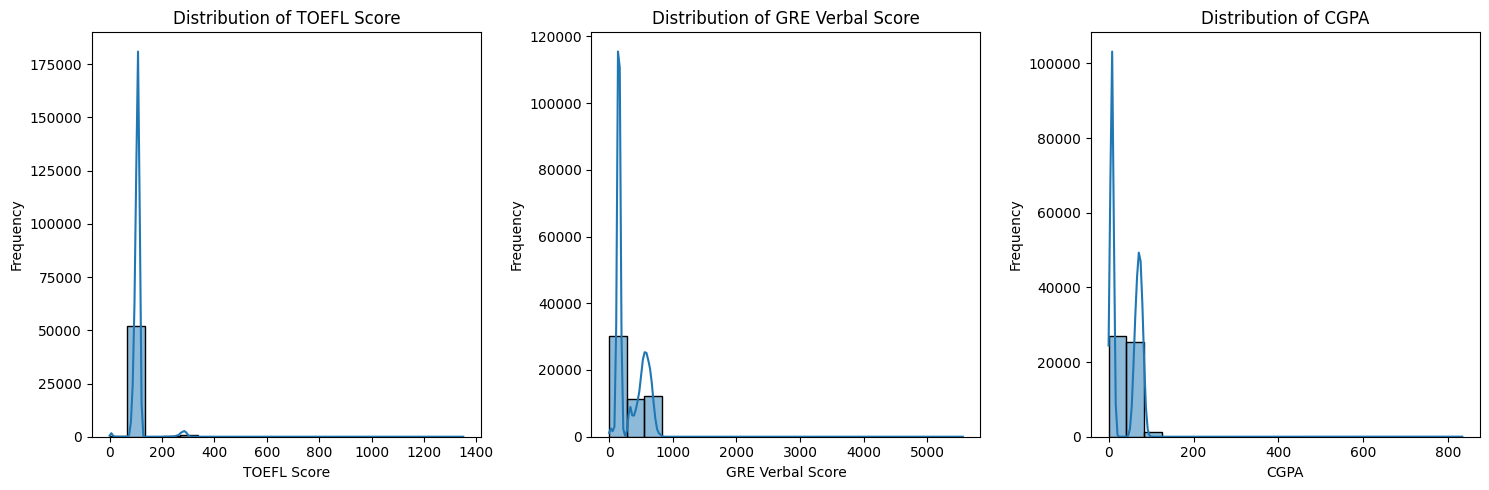

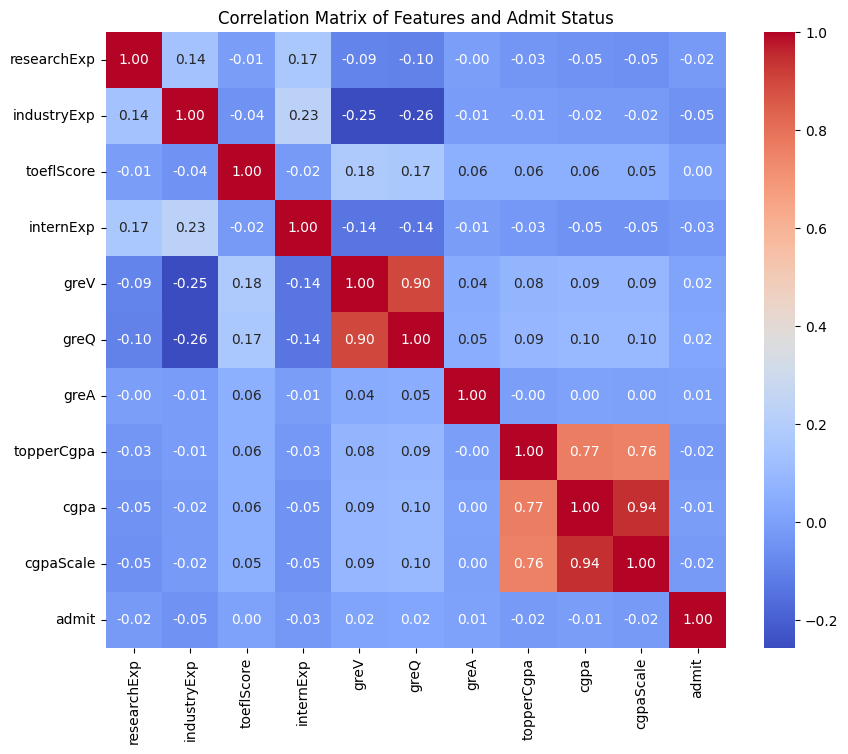

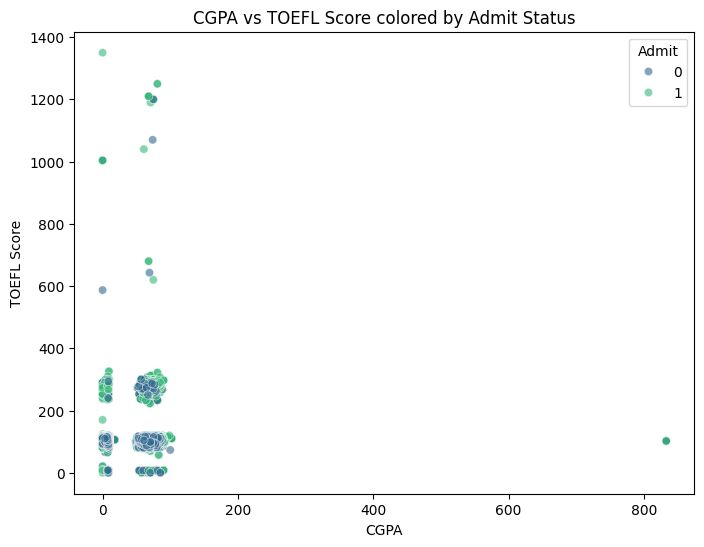


--- Applying Common Machine Learning Algorithms ---

=== Logistic Regression ===
Accuracy: 0.5304

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.15      0.24      5205
           1       0.53      0.89      0.66      5524

    accuracy                           0.53     10729
   macro avg       0.54      0.52      0.45     10729
weighted avg       0.54      0.53      0.46     10729


Confusion Matrix:
 [[ 790 4415]
 [ 623 4901]]

=== Support Vector Machine (SVM) ===
Accuracy: 0.5218

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.09      0.15      5205
           1       0.52      0.93      0.67      5524

    accuracy                           0.52     10729
   macro avg       0.53      0.51      0.41     10729
weighted avg       0.53      0.52      0.42     10729


Confusion Matrix:
 [[ 453 4752]
 [ 379 5145]]

=== Random Forest Classifier ===
Accuracy: 0.57

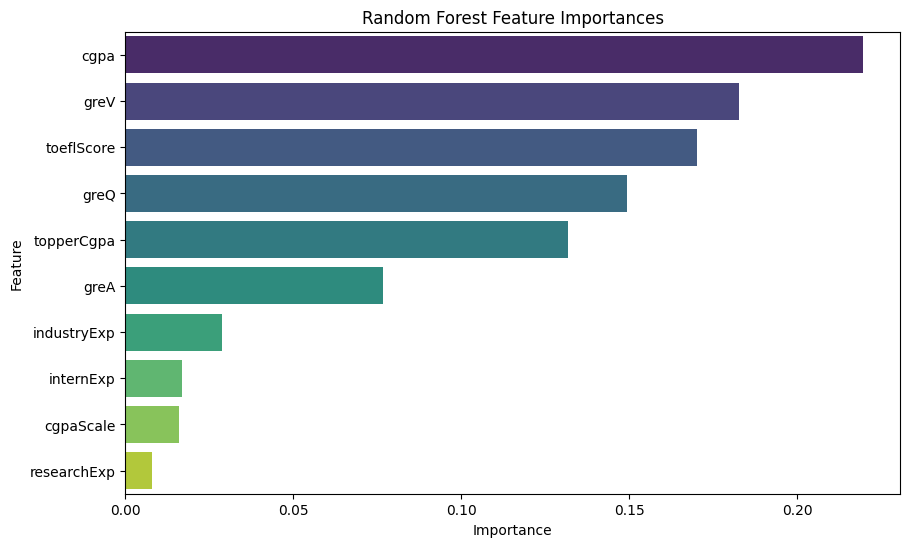


--- Starting Genetic Algorithm Implementation (with Roulette Wheel Selection) ---

Starting GA training for 100 generations...


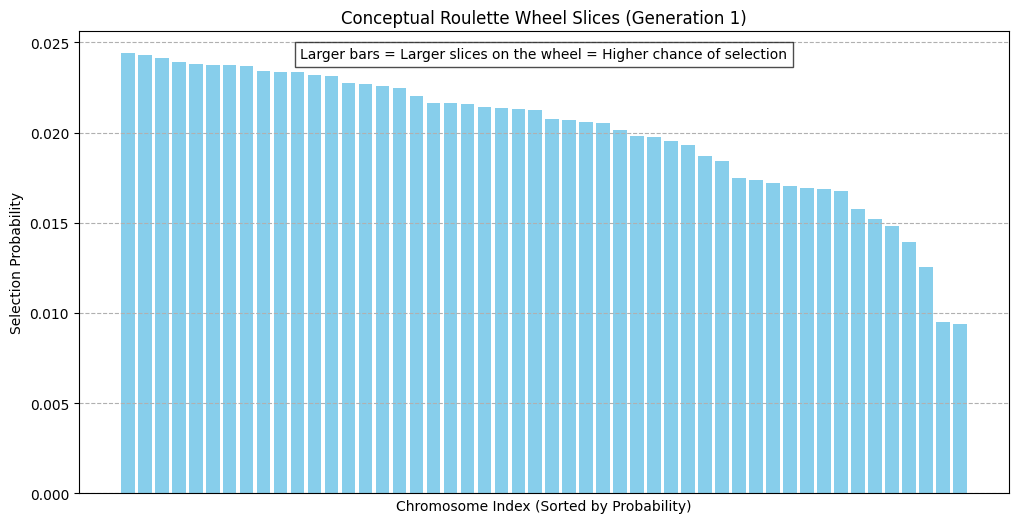


Visualizing Roulette Wheel Selection probabilities for the first generation.


NameError: name 'current_best_idx_idx_ga' is not defined

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations like heatmaps

# --- 1. Data Loading and Preprocessing ---

try:
    df = pd.read_csv(/content/university data.csv')
    print("Data loaded successfully.\n")
    print("--- Data Info (df.info()) ---\n")
    df.info()
    print("\n--- First 5 rows of data (df.head()) ---\n")
    print(df.head())
    print("\n--- Available columns for input and output selection ---\n")
    print(df.columns.tolist())

except FileNotFoundError:
    print("Error: 'university data.csv' not found. Please ensure the file is uploaded to Colab.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Define input features and target output based on data exploration
input_features = [
    'researchExp', 'industryExp', 'toeflScore', 'internExp', 'greV',
    'greQ', 'greA', 'topperCgpa', 'cgpa', 'cgpaScale'
]
target_feature = 'admit'

# Handle missing values by filling them with the mean of the column
print("\n--- Handling Missing Values (Mean Imputation) ---")
for col in input_features:
    if df[col].isnull().any():
        initial_na_count = df[col].isnull().sum()
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled {initial_na_count} missing values in '{col}' with its mean.")
    else:
        print(f"No missing values in '{col}'.")

# Convert selected features and target to NumPy arrays
X = df[input_features].values
y = df[target_feature].values

# Normalize input features (Min-Max Scaling)
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

print("\nData preprocessing complete. Features scaled to [0, 1] range.")

# --- 2. Data Visualizations (As in previous response) ---
print("\n--- Generating Data Visualizations ---")

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['toeflScore'], kde=True, bins=20)
plt.title('Distribution of TOEFL Score')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['greV'], kde=True, bins=20)
plt.title('Distribution of GRE Verbal Score')
plt.xlabel('GRE Verbal Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['cgpa'], kde=True, bins=20)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap
df_scaled_features = pd.DataFrame(X_scaled, columns=input_features)
df_scaled_features['admit'] = y

plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Admit Status')
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['cgpa'], y=df['toeflScore'], hue=df['admit'], palette='viridis', alpha=0.6)
plt.title('CGPA vs TOEFL Score colored by Admit Status')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.legend(title='Admit')
plt.show()

# --- 3. Train-Test Split for Supervised Machine Learning Models ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n--- Applying Common Machine Learning Algorithms ---")

# --- 3.1 Logistic Regression ---
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# --- 3.2 Support Vector Machine (SVM) ---
print("\n=== Support Vector Machine (SVM) ===")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# --- 3.3 Random Forest Classifier ---
print("\n=== Random Forest Classifier ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=[input_features[i] for i in sorted_idx], palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# --- 4. Genetic Algorithm Implementation (Now with Roulette Wheel Selection) ---

print("\n--- Starting Genetic Algorithm Implementation (with Roulette Wheel Selection) ---")

# GA Parameters
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
NUM_INPUTS = len(input_features)
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.8
WEIGHT_BOUNDS = (-1, 1)

# Function to create a single chromosome
def create_chromosome(num_inputs, bounds):
    return np.array([random.uniform(bounds[0], bounds[1]) for _ in range(num_inputs)])

# Fitness Function for GA (using training data for evaluation)
def calculate_fitness_ga(chromosome, X_data, y_data):
    if np.sum(np.abs(chromosome)) == 0:
        return 0.0

    predicted_y = np.dot(X_data, chromosome)
    mse = np.mean((y_data - predicted_y)**2)
    fitness = 1 / (1 + mse)
    return fitness

# === MODIFIED SELECTION FUNCTION: Roulette Wheel Selection ===
def select_parents_roulette_wheel(population, fitnesses, num_parents_to_select):
    parents = []
    total_fitness = sum(fitnesses)

    if total_fitness == 0: # Handle case where all fitnesses are zero
        return random.sample(population, num_parents_to_select)

    # Calculate selection probabilities
    selection_probabilities = [f / total_fitness for f in fitnesses]
    # Calculate cumulative probabilities
    cumulative_probabilities = np.cumsum(selection_probabilities)

    for _ in range(num_parents_to_select):
        r = random.random() # Generate a random number between 0 and 1

        # Find which chromosome corresponds to this random number
        for i, cum_prob in enumerate(cumulative_probabilities):
            if r <= cum_prob:
                parents.append(population[i].copy()) # Add a copy of the selected chromosome
                break
    return parents

# Crossover Function (Single-Point Crossover)
def crossover_ga(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation Function (Gaussian Mutation)
def mutate_ga(chromosome, mutation_rate, bounds):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] += np.random.normal(0, 0.1)
            chromosome[i] = np.clip(chromosome[i], bounds[0], bounds[1])
    return chromosome

# Initialize the first population
population_ga = [create_chromosome(NUM_INPUTS, WEIGHT_BOUNDS) for _ in range(POPULATION_SIZE)]

best_chromosome_ga = None
best_fitness_ga = -1.0
fitness_history_ga = []

print(f"\nStarting GA training for {NUM_GENERATIONS} generations...")

for generation in range(NUM_GENERATIONS):
    fitnesses_ga = [calculate_fitness_ga(chrom, X_train, y_train) for chrom in population_ga]

    # --- VISUALIZATION OF ROULETTE WHEEL SELECTION (for 1st Generation only) ---
    if generation == 0:
        total_fitness_gen0 = sum(fitnesses_ga)
        if total_fitness_gen0 > 0:
            selection_probabilities_gen0 = [f / total_fitness_gen0 for f in fitnesses_ga]

            plt.figure(figsize=(12, 6))
            # Sort probabilities for better visualization (optional but makes bars look "sliced")
            sorted_indices = np.argsort(selection_probabilities_gen0)[::-1]
            sorted_probs = [selection_probabilities_gen0[i] for i in sorted_indices]

            # Using a bar plot to represent slices of the wheel
            plt.bar(range(len(sorted_probs)), sorted_probs, color='skyblue')
            plt.title('Conceptual Roulette Wheel Slices (Generation 1)')
            plt.xlabel('Chromosome Index (Sorted by Probability)')
            plt.ylabel('Selection Probability')
            plt.xticks([]) # Hide x-axis labels for individual chromosomes if too many
            plt.grid(axis='y', linestyle='--')
            plt.text(0.5, 0.95, 'Larger bars = Larger slices on the wheel = Higher chance of selection',
                     horizontalalignment='center', verticalalignment='center',
                     transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
            plt.show()
            print("\nVisualizing Roulette Wheel Selection probabilities for the first generation.")
        else:
            print("\nCannot visualize Roulette Wheel Selection for Generation 1: Total fitness is zero.")


    current_max_fitness_ga = np.max(fitnesses_ga)
    fitness_history_ga.append(current_max_fitness_ga)

    current_best_idx_ga = np.argmax(fitnesses_ga)
    if fitnesses_ga[current_best_idx_ga] > best_fitness_ga:
        best_fitness_ga = fitnesses_ga[current_best_idx_ga]
        best_chromosome_ga = population_ga[current_best_idx_ga].copy()

    if (generation + 1) % 10 == 0 or generation == 1:
        print(f"Generation {generation + 1}/{NUM_GENERATIONS}: Best Fitness = {best_fitness_ga:.4f} (Gen Max: {current_max_fitness_ga:.4f})")

    next_population_ga = []
    num_elites = 1
    sorted_population_indices_ga = np.argsort(fitnesses_ga)[::-1]
    for i in range(num_elites):
        next_population_ga.append(population_ga[sorted_population_indices_ga[i]])

    while len(next_population_ga) < POPULATION_SIZE:
        # === Using the MODIFIED select_parents_roulette_wheel function ===
        parent1_ga, parent2_ga = select_parents_roulette_wheel(population_ga, fitnesses_ga, 2)

        if random.random() < CROSSOVER_RATE:
            child1_ga, child2_ga = crossover_ga(parent1_ga, parent2_ga)
        else:
            child1_ga, child2_ga = parent1_ga.copy(), parent2_ga.copy()

        child1_ga = mutate_ga(child1_ga, MUTATION_RATE, WEIGHT_BOUNDS)
        child2_ga = mutate_ga(child2_ga, MUTATION_RATE, WEIGHT_BOUNDS)

        next_population_ga.append(child1_ga)
        if len(next_population_ga) < POPULATION_SIZE:
            next_population_ga.append(child2_ga)

    population_ga = next_population_ga


print("\n--- Genetic Algorithm Training Finished ---")
print(f"Best Chromosome (Input Weights): {best_chromosome_ga}")
print(f"Best Fitness Achieved: {best_fitness_ga:.4f}")

print("\nFinal GA Input Weights (in order):")
for i, weight in enumerate(best_chromosome_ga):
    print(f"- {input_features[i]}: {weight:.4f}")

# --- 5. GA Fitness History Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_GENERATIONS + 1), fitness_history_ga)
plt.title('Genetic Algorithm - Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Higher is Better)')
plt.grid(True)
plt.show()

# --- 6. Example GA Prediction on Test Data ---
print("\n--- GA Performance on Test Data ---")
ga_test_predictions_raw = np.dot(X_test, best_chromosome_ga)
ga_test_predictions_binary = (ga_test_predictions_raw > 0.5).astype(int)

print(f"GA Model Accuracy on Test Data: {accuracy_score(y_test, ga_test_predictions_binary):.4f}")
print("\nGA Model Classification Report on Test Data:\n", classification_report(y_test, ga_test_predictions_binary))
print("\nGA Model Confusion Matrix on Test Data:\n", confusion_matrix(y_test, ga_test_predictions_binary))